In [28]:
import pandas as pd
import os

In [27]:
caa_dataset = "/opt/tmp/src/CyberAgressionAdo-v1"
output_dir = "../../data/processed/"

<AxesSubplot: >

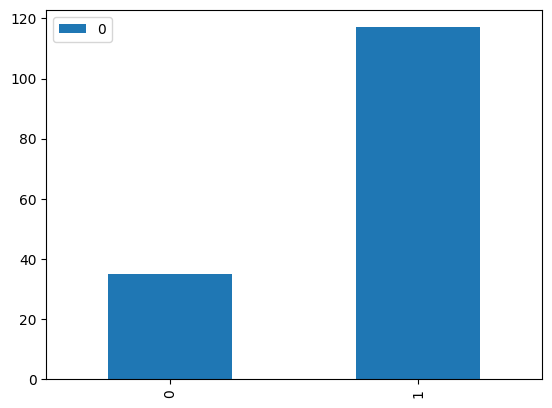

In [26]:
import glob

filelist = glob.glob(caa_dataset + "/*/*")
df_dict = {x:pd.read_csv(x, index_col=[0]) for x in filelist}

df = df_dict[filelist[0]]
verbal_abuse_df = df \
    .loc[df.verbal_abuse.isin(["none", "denigration"]) == False] \
    [["Unnamed: 2"]]

no_abuse_df = df \
    .loc[df.verbal_abuse == "none"] \
    [["Unnamed: 2"]]

pd.DataFrame([verbal_abuse_df.shape[0], no_abuse_df.shape[0]]).plot.bar()

In [25]:
caa_verbal_abuse_df_list = []
caa_no_abuse_df_list = []

for path in filelist:
    df_dict = {x:pd.read_csv(x, index_col=[0]) for x in filelist}
    df = df_dict[filelist[0]]
    verbal_abuse_df = df \
        .loc[df.verbal_abuse.isin(["none", "denigration"]) == False] \
        [["Unnamed: 2"]]

    no_abuse_df = df \
        .loc[df.verbal_abuse == "none"] \
        [["Unnamed: 2"]]
    caa_verbal_abuse_df_list.append(verbal_abuse_df)
    caa_no_abuse_df_list.append(no_abuse_df)
    
caa_verbal_abuse_df = pd.concat(caa_verbal_abuse_df_list)
caa_no_abuse_df = pd.concat(caa_no_abuse_df_list)
print("N verbal abuses: ", caa_verbal_abuse_df.shape[0])
print("N no verbnal abuses: ", caa_no_abuse_df.shape[0])

caa_verbal_abuse_df.to_csv(os.path.join(output_dir, "caa_positive.csv"))
caa_no_abuse_df.to_csv(os.path.join(output_dir, "caa_negative.csv"))

N verbal abuses:  945
N no verbnal abuses:  3159
